In [50]:
import os
import glob
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Figures and plot settings
#plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 600

## Path and Load dataframes (pigments, spectral indices, spectral signature of ROIs)

In [51]:
PATH = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results")

In [52]:
# Pigment dataframe
pigment_df = pd.read_csv(PATH / "pigment-mg-mm.csv", index_col=0)
pigment_df.rename({'CE01A':'CE01'}, axis=1, inplace=True)
pigment_df.head()

,CE01,CE01B,CE02,CE03,CE03B,CE04,GN02,GN03,GN04,GN05,GN06,GN07,GN08,GS03
PE (mg/mm2),0.000303,0.000000,0.005951,0.005924,0.000000,0.000507,0.019239,0.015164,0.033692,0.032587,0.029773,0.040677,0.015348,0.025279
PC (mg/mm2),0.000000,0.000820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000122,0.000222,0.000078,0.000038,0.000000,0.000000,0.000000
Chl (mg/mm2),4.594650,0.887749,3.690064,4.911662,4.882581,16.169264,1.932754,1.523085,1.897738,2.432997,2.206348,3.022649,7.686603,2.722183
Pheo (mg/mm2),3.056849,0.493918,6.160013,8.011731,5.772359,27.136483,2.198020,1.735810,2.425624,3.325927,2.976991,3.672839,2.021567,3.402316
K_APC (mg/mm2),163.441606,0.000000,0.000000,5.900500,3.911680,10.145354,17.615823,0.521381,2.313272,1.964448,1.549762,3.522178,3.715468,3.751725


In [53]:
spectral_indices = pd.read_csv(PATH / "spectral-indices.csv", index_col=0)
spectral_indices.tail()

,CE01,CE01B,CE02,CE03,CE03B,CE04,CE05,GN02,GN03,GN04,GN05,GN06,GN07,GN08,GS03
dd434,0.000210,0.000177,0.000138,0.000118,0.000110,0.000162,0.000291,0.000231,0.000228,0.000187,0.000084,0.000305,0.000192,0.000149,0.000297
dd494,0.000455,0.000307,0.000454,0.000288,-0.000013,0.000365,0.000619,0.000559,0.000372,0.000557,0.000550,0.000778,0.000456,0.000493,0.000626
dd563,0.000339,0.000200,0.000498,0.000382,-0.000059,0.000376,0.000651,0.000470,0.000289,0.000503,0.000617,0.000736,0.000370,0.000413,0.000590
dd624,0.000039,0.000030,0.000091,0.000013,-0.000029,0.000111,0.000176,0.000351,0.000247,0.000312,0.000297,0.000339,0.000280,0.000293,0.000305
dd665,0.000734,0.000750,0.000995,0.000712,0.000700,0.000906,0.000914,0.001006,0.000899,0.000871,0.000845,0.001045,0.000821,0.000812,0.000931


In [54]:
df_merged = pd.concat([pigment_df.T, spectral_indices.T], axis=1)
# CE01 had an erroneous measurement in the Spectrophotometer, might need to drop
# CE05 had a low amount of CCA cover, so no validation available
df_merged.drop(['CE05'], axis=0, inplace=True)
df_merged.head()

,PE (mg/mm2),PC (mg/mm2),Chl (mg/mm2),Pheo (mg/mm2),K_APC (mg/mm2),K_PC (mg/mm2),K_PE (mg/mm2),S_PC (mg/mm2),S_PE (mg/mm2),NDVI,...,ddND_652,ddSR_652,ddND_665,ddSR_665,dd417,dd434,dd494,dd563,dd624,dd665
CE01,0.000303,0.00000,4.594650,3.056849,163.441606,55.882094,121.938668,0.005346,0.006750,0.290743,...,-0.692441,0.181725,-1.418598,-0.173075,0.000050,0.000210,0.000455,0.000339,0.000039,0.000734
CE01B,0.000000,0.00082,0.887749,0.493918,0.000000,0.000000,0.000000,0.000000,0.000000,0.289068,...,-0.435162,0.393571,-1.996733,-0.332607,0.000061,0.000177,0.000307,0.000200,0.000030,0.000750
CE02,0.005951,0.00000,3.690064,6.160013,0.000000,4.574510,66.870611,0.002294,0.016907,0.433702,...,-0.808663,0.105789,-1.169230,-0.078014,0.000064,0.000138,0.000454,0.000498,0.000091,0.000995
CE03,0.005924,0.00000,4.911662,8.011731,5.900500,4.580943,70.764552,0.007047,0.020279,0.265047,...,-0.699318,0.176943,-1.436495,-0.179149,0.000261,0.000118,0.000288,0.000382,0.000013,0.000712
CE03B,0.000000,0.00000,4.882581,5.772359,3.911680,2.298742,16.958717,0.002654,0.003402,0.216528,...,-0.539206,0.299371,-1.488256,-0.196224,0.000220,0.000110,-0.000013,-0.000059,-0.000029,0.000700


In [55]:
## Add Site column
site = []

for i, sample in enumerate(df_merged.index):
    s = df_merged.index[i][0:2]
    site.append(s);

df_merged.insert(loc=0, column = 'Site', value = np.array(site))
df_merged

,Site,PE (mg/mm2),PC (mg/mm2),Chl (mg/mm2),Pheo (mg/mm2),K_APC (mg/mm2),K_PC (mg/mm2),K_PE (mg/mm2),S_PC (mg/mm2),S_PE (mg/mm2),...,ddND_652,ddSR_652,ddND_665,ddSR_665,dd417,dd434,dd494,dd563,dd624,dd665
CE01,CE,0.000303,0.000000,4.594650,3.056849,163.441606,55.882094,121.938668,0.005346,0.006750,...,-0.692441,0.181725,-1.418598,-0.173075,0.000050,0.000210,0.000455,0.000339,0.000039,0.000734
CE01B,CE,0.000000,0.000820,0.887749,0.493918,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.435162,0.393571,-1.996733,-0.332607,0.000061,0.000177,0.000307,0.000200,0.000030,0.000750
CE02,CE,0.005951,0.000000,3.690064,6.160013,0.000000,4.574510,66.870611,0.002294,0.016907,...,-0.808663,0.105789,-1.169230,-0.078014,0.000064,0.000138,0.000454,0.000498,0.000091,0.000995
CE03,CE,0.005924,0.000000,4.911662,8.011731,5.900500,4.580943,70.764552,0.007047,0.020279,...,-0.699318,0.176943,-1.436495,-0.179149,0.000261,0.000118,0.000288,0.000382,0.000013,0.000712
CE03B,CE,0.000000,0.000000,4.882581,5.772359,3.911680,2.298742,16.958717,0.002654,0.003402,...,-0.539206,0.299371,-1.488256,-0.196224,0.000220,0.000110,-0.000013,-0.000059,-0.000029,0.000700
CE04,CE,0.000507,0.000000,16.169264,27.136483,10.145354,7.466658,87.998646,0.007361,0.019403,...,-0.669577,0.197908,-1.463496,-0.188146,0.000645,0.000162,0.000365,0.000376,0.000111,0.000906
GN02,GN,0.019239,0.000000,1.932754,2.198020,17.615823,6.511653,51.850860,0.004404,0.024908,...,-0.670296,0.197392,-1.603028,-0.231664,0.000138,0.000231,0.000559,0.000470,0.000351,0.001006
GN03,GN,0.015164,0.000122,1.523085,1.735810,0.521381,0.482437,28.689143,0.001853,0.017980,...,-0.724160,0.159985,-1.406636,-0.168964,0.000179,0.000228,0.000372,0.000289,0.000247,0.000899
GN04,GN,0.033692,0.000222,1.897738,2.425624,2.313272,1.801314,66.516845,0.004181,0.039901,...,-0.718139,0.164050,-1.470680,-0.190506,0.000107,0.000187,0.000557,0.000503,0.000312,0.000871
GN05,GN,0.032587,0.000078,2.432997,3.325927,1.964448,1.820715,70.242966,0.003764,0.039361,...,-0.713979,0.166876,-1.521764,-0.206904,0.000127,0.000084,0.000550,0.000617,0.000297,0.000845


In [67]:
# Export csv
df_merged.to_csv(PATH / 'FULL-pigments-indices.csv', float_format='%f')

## Pigment plot

In [56]:
# Where to store figure
out_p = r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results\Spectrophotometry"

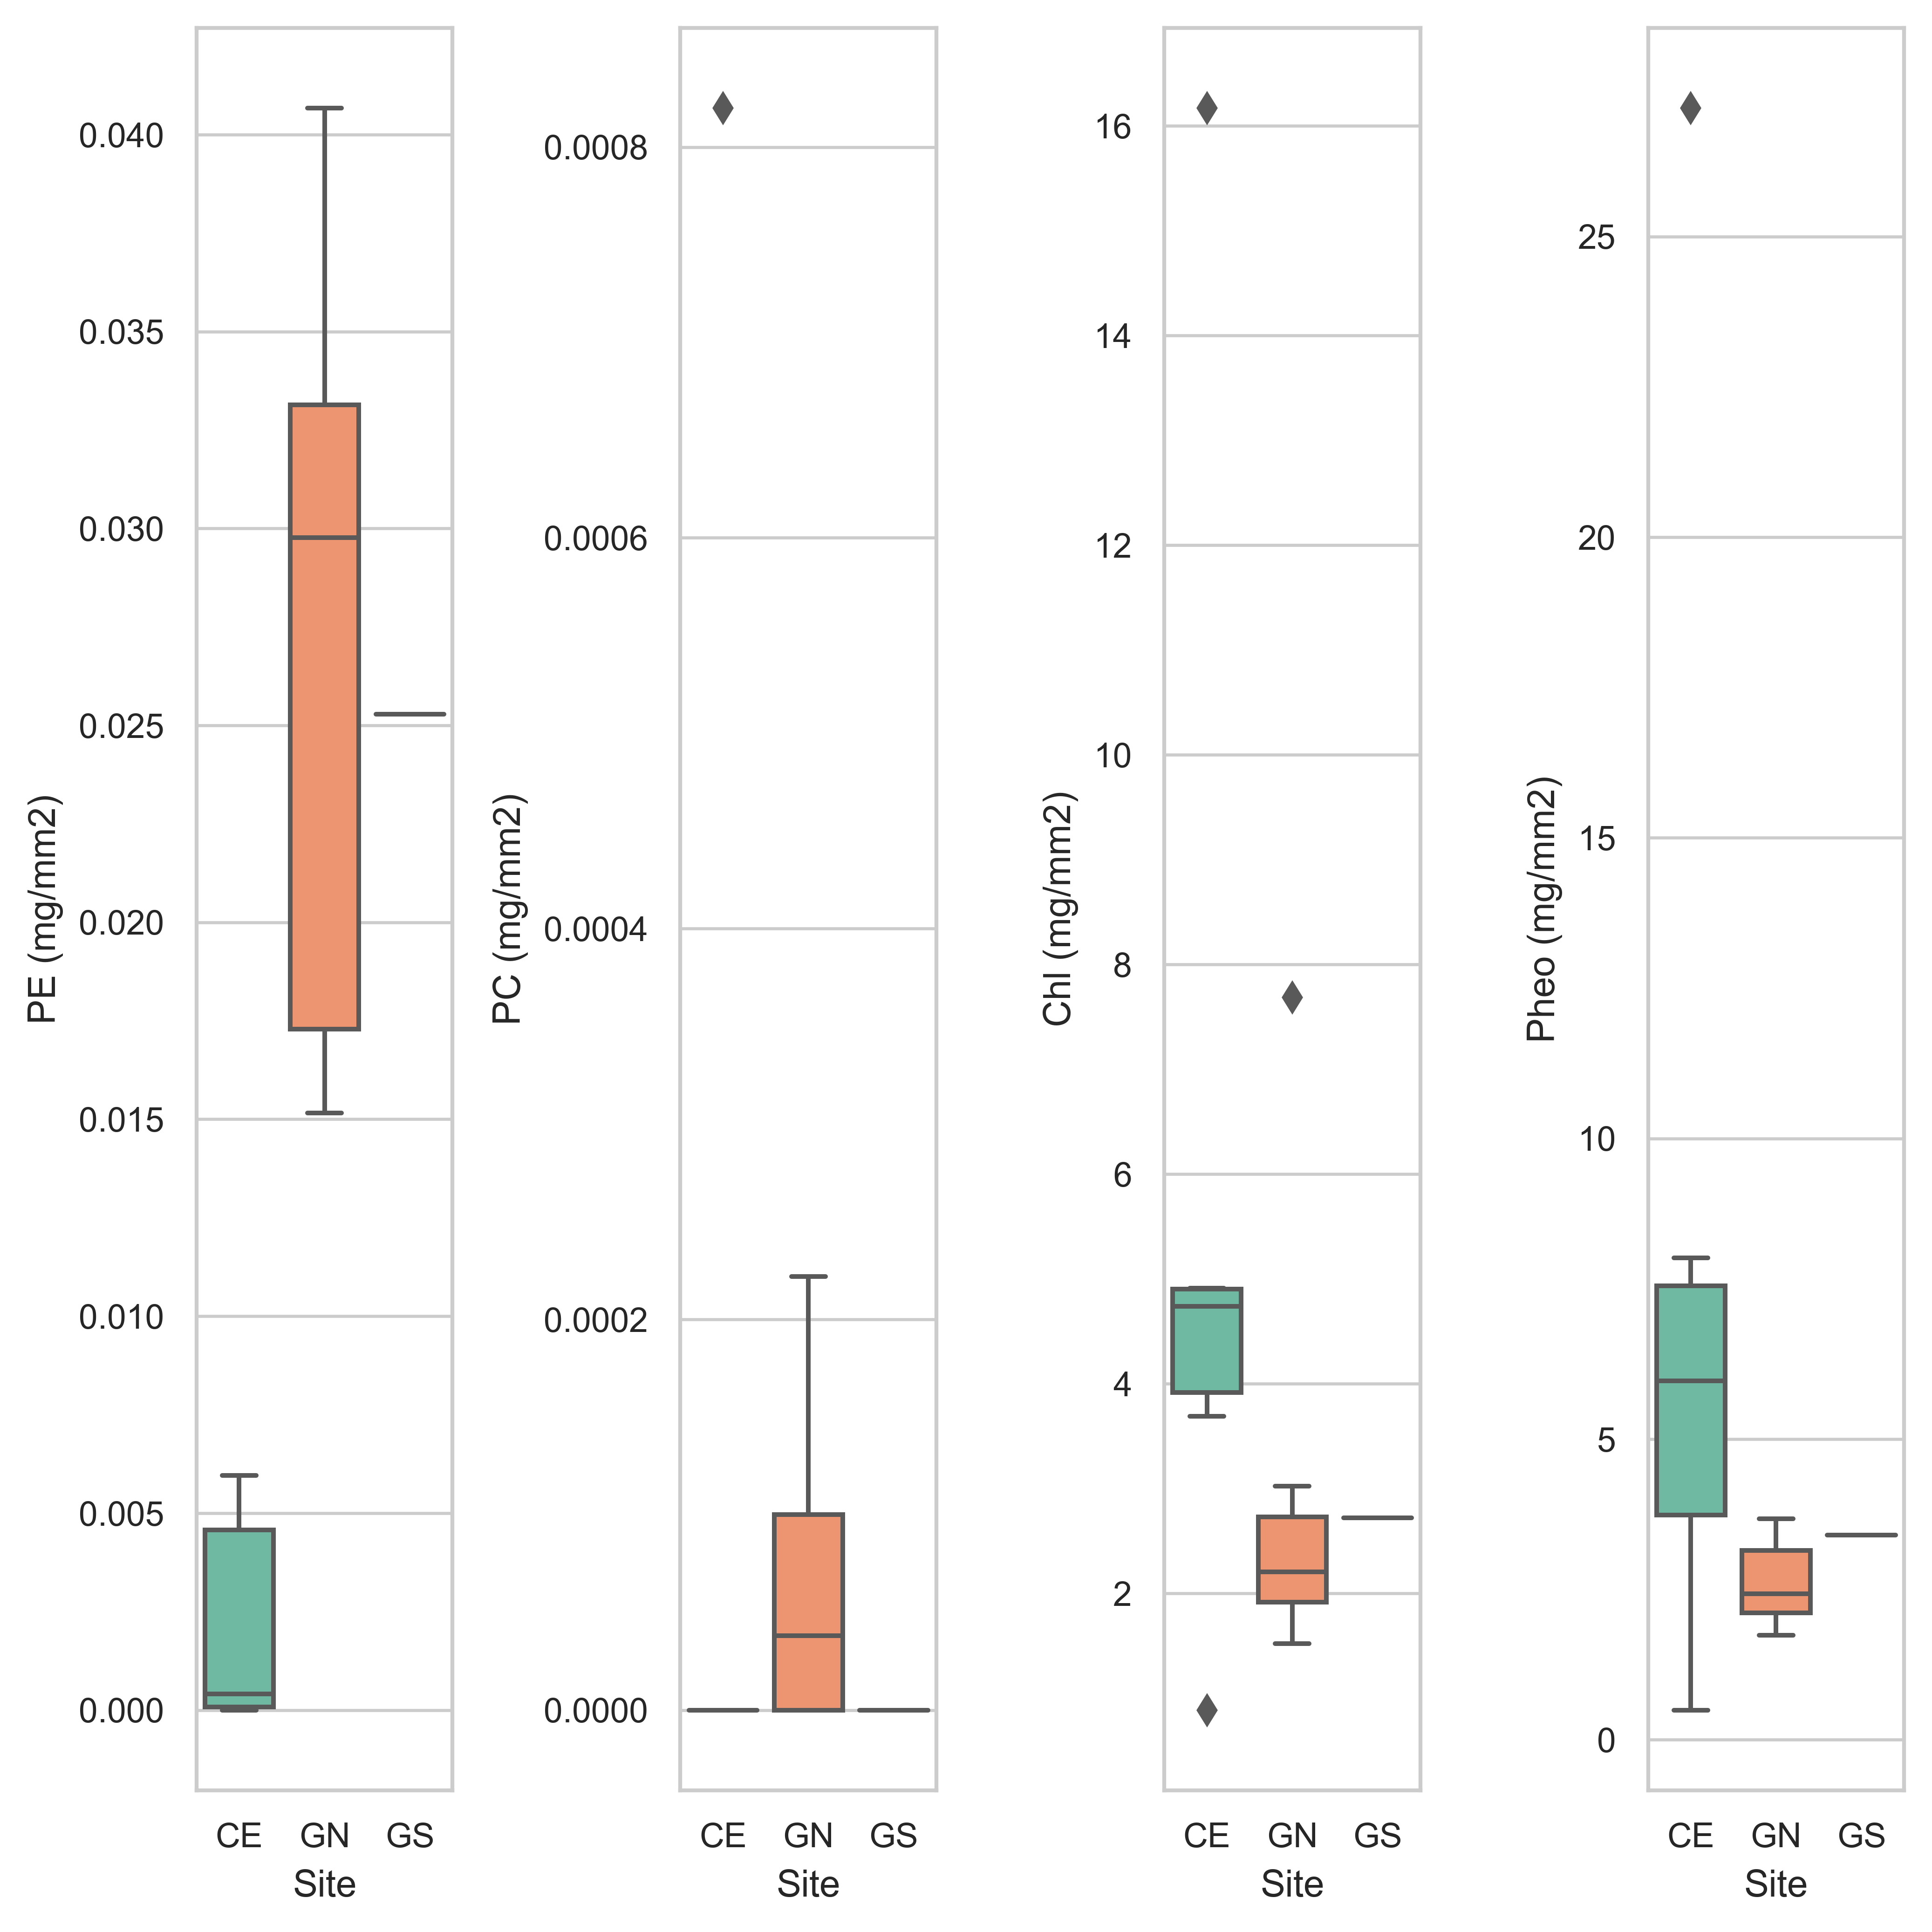

In [57]:
sns.set(rc={'figure.figsize':(2,2)})
sns.set_context("paper")
sns.set_style('whitegrid')
sns.set_palette('Set2',3)

fig, axes = plt.subplots(1,4, figsize=(7,7))

sns.boxplot(data = df_merged, y='PE (mg/mm2)', x='Site', ax=axes[(0)], saturation=0.8)
sns.boxplot(data = df_merged, y='PC (mg/mm2)', x='Site', ax=axes[(1)], saturation=0.8)
sns.boxplot(data = df_merged, y='Chl (mg/mm2)', x='Site', ax=axes[(2)], saturation=0.8)
sns.boxplot(data = df_merged, y='Pheo (mg/mm2)', x='Site', ax=axes[(3)], saturation=0.8)

fig.tight_layout()
#plt.savefig(out_p + '\Pigments-Plot.png', dpi=600)
plt.show()

In [58]:
corr_df = df_merged.corr(method='spearman')
corr_df.iloc[9:,:4].style.background_gradient(cmap='coolwarm')
#corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)

,PE (mg/mm2),PC (mg/mm2),Chl (mg/mm2),Pheo (mg/mm2)
NDVI,0.653466,0.064034,-0.292308,-0.507692
PSRI,-0.330033,-0.135752,0.327473,0.428571
PRI,0.748075,0.007684,-0.186813,-0.353846
EVI,0.624863,0.110139,-0.481319,-0.349451
MCARI,0.657866,0.084525,-0.349451,-0.472527
PSND_CHLA,0.653466,0.064034,-0.292308,-0.507692
PSND_CHLB,0.635864,-0.002561,-0.252747,-0.459341
PSSR_CHLA,0.653466,0.064034,-0.292308,-0.507692
PSSR_CHLB,0.635864,-0.002561,-0.252747,-0.459341
PSND_494,0.726073,0.012807,-0.213187,-0.415385


## Linear model plots

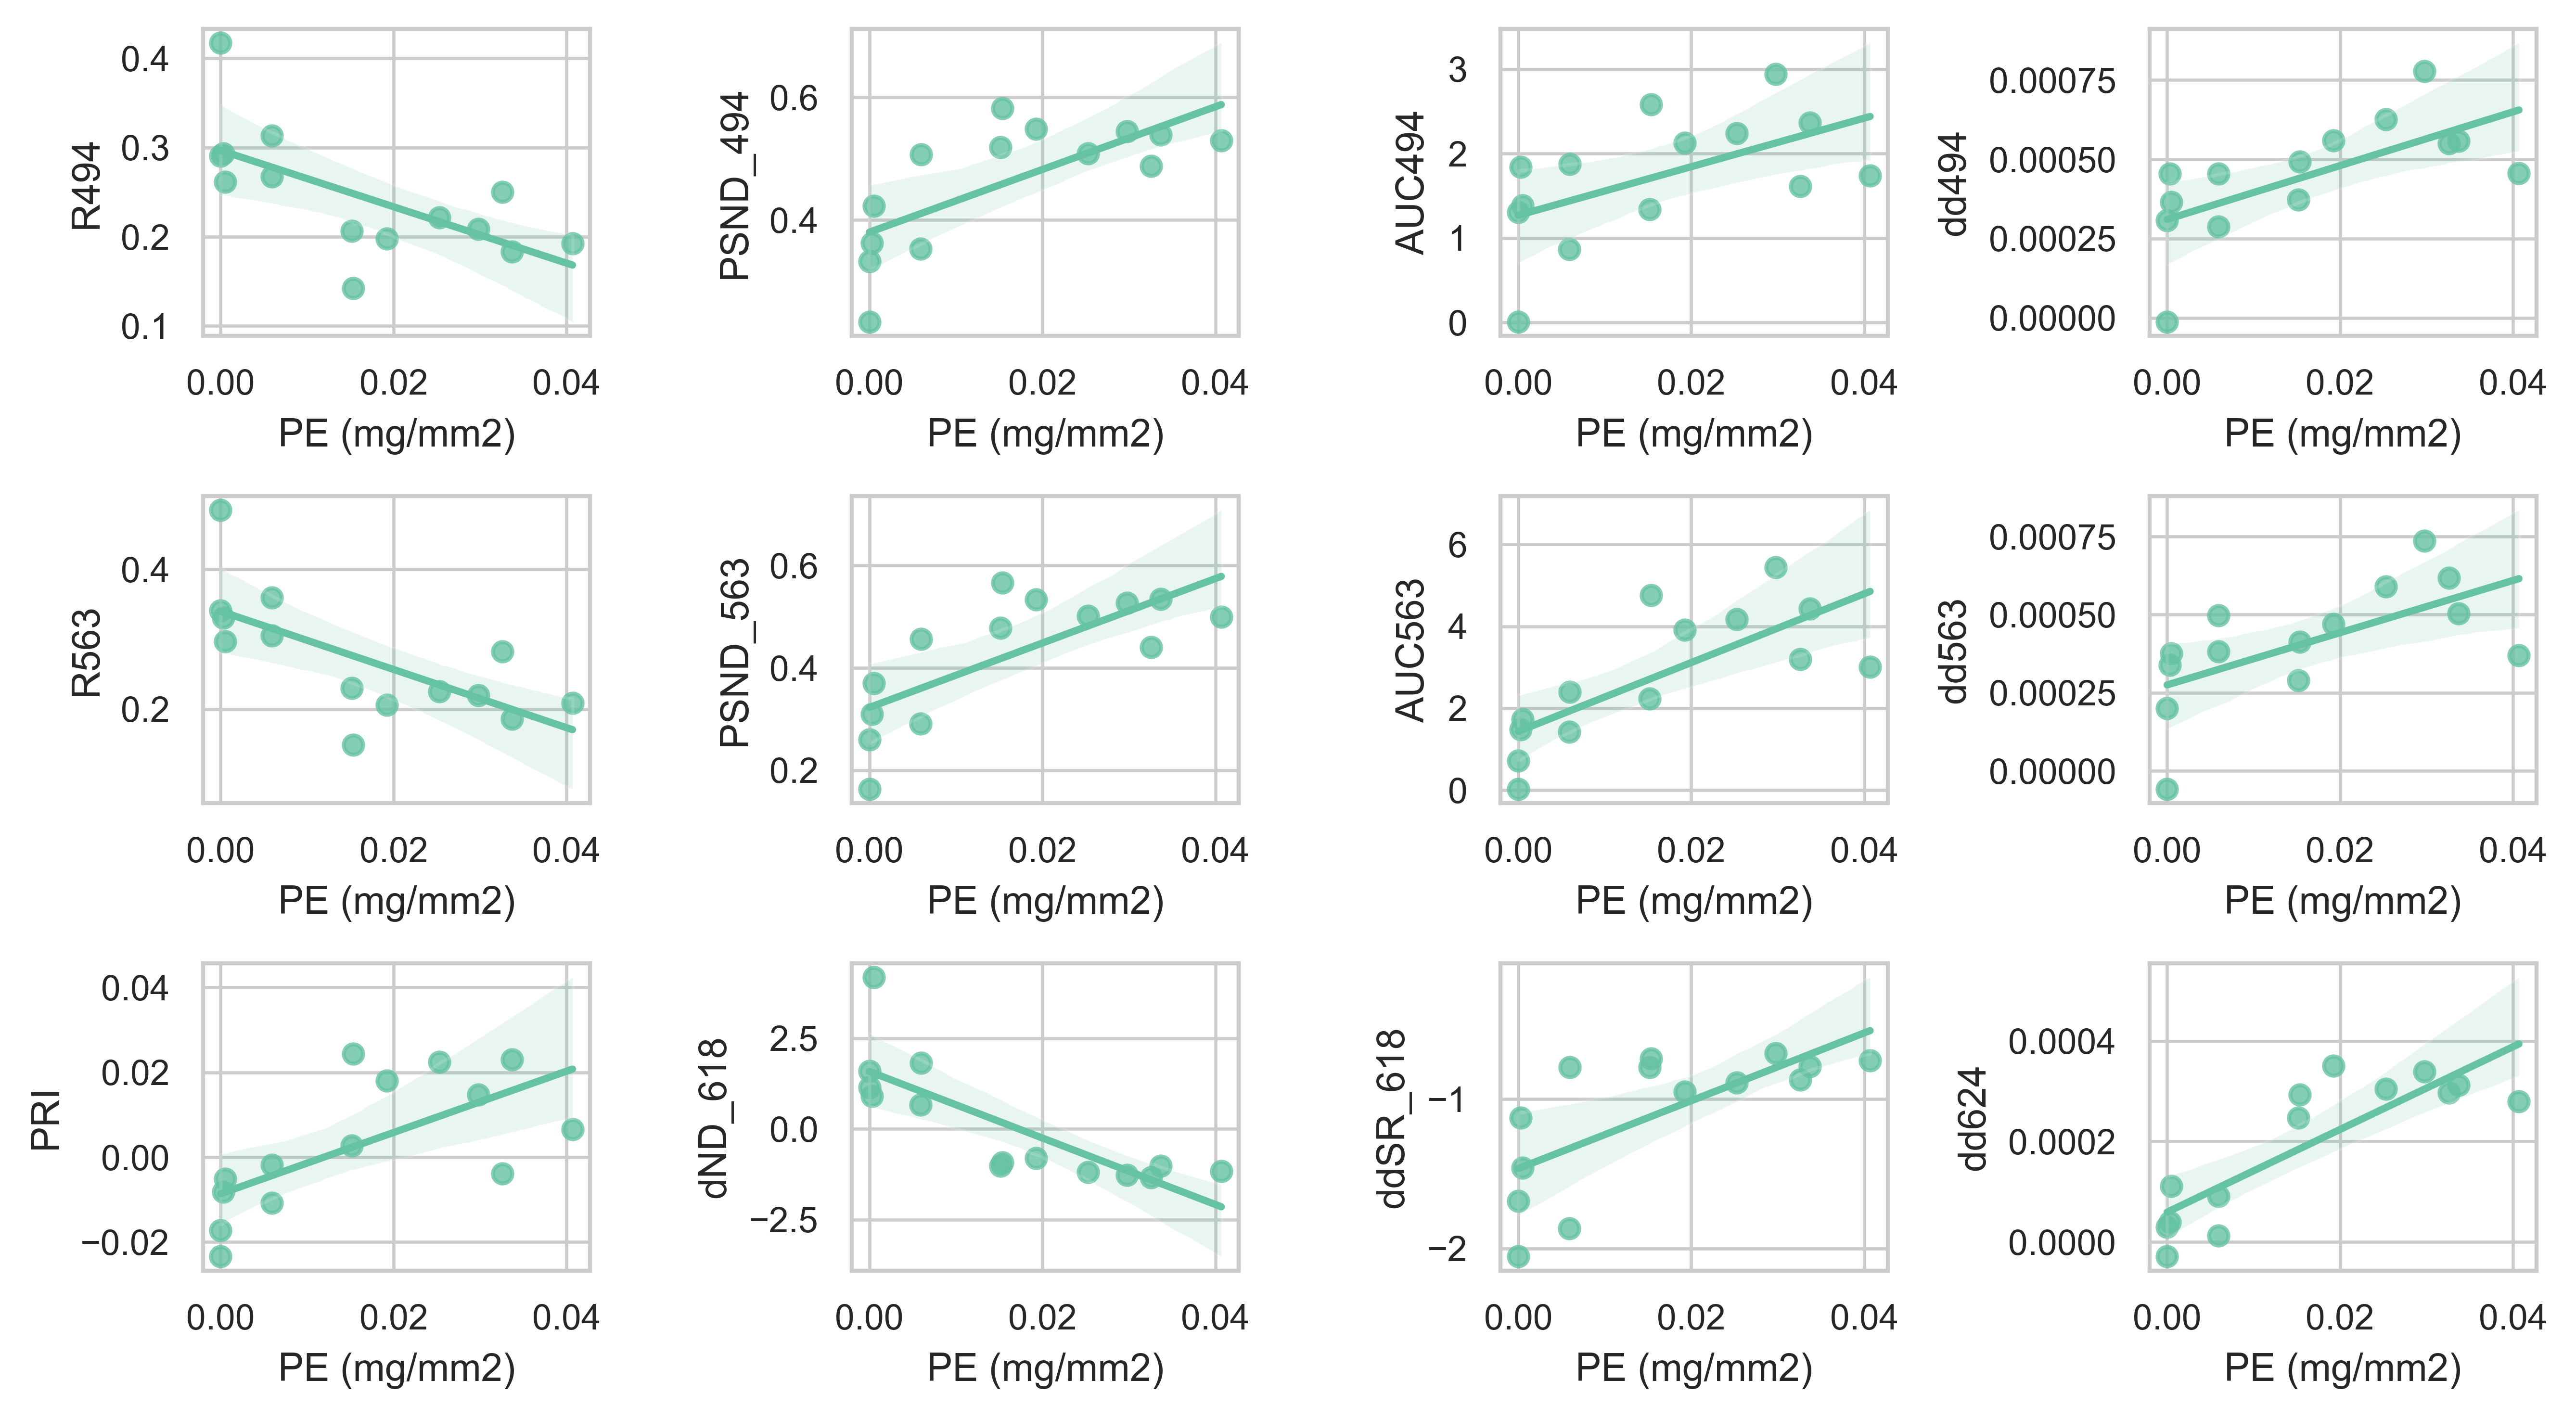

In [66]:
fig, axes = plt.subplots(3,4, figsize=(9,5))
#fig, axes = plt.subplots(4,4, sharex=False, figsize=(12,9))

sns.regplot(x="PE (mg/mm2)", y="R494", data=df_merged, ax=axes[(0,0)], ci=95, seed = 1)
sns.regplot(x="PE (mg/mm2)", y="R563", data=df_merged, ax=axes[(1,0)], ci=95, seed = 1)
sns.regplot(x="PE (mg/mm2)", y="PRI", data=df_merged, ax=axes[(2,0)], ci=95, seed = 1)

sns.regplot(x="PE (mg/mm2)", y="PSND_494", data=df_merged, ax=axes[(0,1)], ci=95, seed = 1)
sns.regplot(x="PE (mg/mm2)", y="PSND_563", data=df_merged, ax=axes[(1,1)], ci=95, seed = 1)
sns.regplot(x="PE (mg/mm2)", y="dND_618", data=df_merged, ax=axes[(2,1)], ci=95, seed = 1)

sns.regplot(x="PE (mg/mm2)", y="AUC494", data=df_merged, ax=axes[(0,2)], ci=95, seed = 1)
sns.regplot(x="PE (mg/mm2)", y="AUC563", data=df_merged, ax=axes[(1,2)], ci=95, seed = 1)
sns.regplot(x="PE (mg/mm2)", y="ddSR_618", data=df_merged, ax=axes[(2,2)], ci=95, seed = 1)

sns.regplot(x="PE (mg/mm2)", y="dd494", data=df_merged, ax=axes[(0,3)], ci=95, seed = 1)
sns.regplot(x="PE (mg/mm2)", y="dd563", data=df_merged, ax=axes[(1,3)], ci=95, seed = 1)
sns.regplot(x="PE (mg/mm2)", y="dd624", data=df_merged, ax=axes[(2,3)], ci=95, seed = 1)

plt.tight_layout()
plt.show()

In [ ]:
linmodel = sns.lmplot(x="PE (mg/mm2)", y = "AUC563", data=df_merged, ci=95, seed = 1, hue='Site', fit_reg=False)
sns.regplot(x="PE (mg/mm2)", y = "AUC563", data=df_merged, ci=95, seed = 1, scatter=False)
plt.show()

In [ ]:
df_merged.plot(x="PSRI", y = "Chl (mg/mm2)", kind="scatter")
df_merged.plot(x="AUC417", y="Chl (mg/mm2)", kind="scatter")
df_merged.plot(x="AUC563", y="PE (mg/mm2)", kind="scatter")
df_merged.plot(x="AUC563", y="PC (mg/mm2)", kind="scatter")
df_merged.plot(x="PSSR_PB494", y="PE (mg/mm2)", kind="scatter")
df_merged.plot(x="PSSR_PB494", y="PC (mg/mm2)", kind="scatter")
df_merged.plot(x="PSND_CHLA", y="PE (mg/mm2)", kind="scatter")
plt.show()